In [2]:
# librerias
import re 
import statistics as st
from unicodedata import normalize 
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy.stats import normaltest
from scipy import stats 


In [3]:
#Lista de letras 
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
            'n','ñ', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

vowels = ['a','e','i','o','u']

consonants = ['b','c','d','f','g','h','j','k','l','m','n',
              'ñ','p','q','r','s','t','v','w','x','y','z']

In [4]:
#Leer las palabras
with open('Data_Base_Words_Filter.txt', 'r',encoding= 'utf-8') as raw_file:

  logs_text = raw_file.read()

#print(logs_text)
words_filter_list = re.sub('[\s]', ' ',logs_text).split()
print(len(words_filter_list))

with open('Data_Base_Final_Words.txt', 'r',encoding= 'utf-8') as raw_file:

  logs_text = raw_file.read()

#print(logs_text)
words_final_list = re.sub('[\s]', ' ',logs_text).split()
print(len(words_final_list))

214598
32430


In [5]:
#Funcion para calcular medidas estadìsticas a una lista
def calculate_stadistics(numbers_list):
    quartil_1 = np.percentile(numbers_list, 25)
    quartil_2 = np.percentile(numbers_list, 50)
    quartil_3 = np.percentile(numbers_list, 75)
    p99 = np.percentile(numbers_list, 99)-1
    median = np.median(numbers_list)
    mode = st.mode(numbers_list)
    mean = np.mean(numbers_list)
    variance = np.var(numbers_list)
    deviation = np.std(numbers_list)
    atipical = quartil_3 + (1.5*(quartil_3-quartil_1))
    return[quartil_1,quartil_2,quartil_2,p99,median,mode,mean,variance,deviation,atipical]

In [6]:
#Funcion para contar el numero de letras de cada palabra
#La funcion devuelve una lista, la poscion 0 es unla lista por posicion el numero de palabras de la longitud
# la posicion 1 devulve las palabras con la longitud que se le asigne en en long
# la posicion 2 devulve la longitud de cada palabra 
def len_words(words_list):
    letters_in_a_word = []
    for word in words_list:
        cont = 0
        for letter in word:
            cont += 1
        letters_in_a_word.append(cont)
    words_long = [0 for i in range(max(letters_in_a_word)+1)]
    for num in letters_in_a_word:
        words_long[num] += 1
    return [words_long,letters_in_a_word]

# create list of works to specific lenght

def words_specific_length(long,words_list):    
    words = []
    max_len = len(max(words_list,key = len))
    if long <= max_len:
        for word in words_list:
            if len(word) == long:
                words.append(word)
    else:
        words = ['0']
    return words



In [7]:
#funcion para hacer graficos de barras
def bars_diagram(x_list,y_list,title = 'Diagrama de Barras',labelx='',labely='',stadistics=None,move=0,sizex=10,sizey=6):
    # create a dataset
    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i,y[i],y[i])
            
    plt.figure(figsize = (sizex,sizey))
    height = y_list
    bars = x_list
    x_pos = np.arange(len(bars))
    
    # Create bars
    plt.bar(x_pos, height, color=(0.2, 0.4, 0.6, 0.6), data= x_list )
    #graphic
    if stadistics != None:
        if len(stadistics)== 10:
            plt.axvline(stadistics[0]-move,color = 'b',label = 'Q1')
            plt.axvline(stadistics[1]-move,color = 'g',label = 'Q2')
            plt.axvline(stadistics[2]-move,color = 'y',label = 'Q3')
            plt.axvline(stadistics[3]-move,color = 'r',label = 'P99')
            plt.legend()
            


             # Create names on the x-axis
            plt.xticks(x_pos, bars)
            # Show graph
            plt.title(title,size = 18)
            plt.xlabel(labelx,size= 15)
            plt.ylabel(labely,size = 15)
            addlabels(x_list, y_list)
            print('La mediana es: {}'.format(stadistics[4]))
            print('La moda es: {}'.format(stadistics[5]))
            print('La media es: {}'.format(stadistics[6]))
            print('La varianza es: {}'.format(stadistics[7]))
            print('La desviacion estandar es: {}'.format(stadistics[8]))
            return plt.show()
        
        else:
            'Parametros de estadistica malos'
    # Create names on the x-axis
    plt.xticks(x_pos, bars)
    # Show graph
    plt.title(title,size = 18)
    plt.xlabel(labelx,size=14)
    plt.ylabel(labely,size=14)
    addlabels(x_list, y_list)
    return plt.show()

In [8]:
#Funcion para hacer diccionario de posiciones de las letras del primer parametro con las letras del segundo parametro

def posittion_dict(letters_list,words_list):
    dicts = {}
    for letter in letters_list:
        for word in words_list:
            for letter1 in range(len(word)):
                if letter == word[letter1]:
                    if letter not in dicts:
                        dicts[letter] = []
                    dicts[letter].append(letter1+1)
                    
    return dicts


In [20]:
# Cuenta el nuemro de veces que se repiten las palabras
frequency_words = []
for word in words_final_list:
    count = words_filter_list.count(word)
    frequency_words.append(count)

In [21]:

order_words_list = frequency_words[:]
order_words_list.sort(reverse=True)



In [9]:
#Funcion para hacer grafico de barras descendente
def bars_graphs_descending(x_axis,y_axis,title = 'Diagrama de Barras Descendente',
                           labelx='Eje x',labely='Eje y',sizex=10,sizey=6):
    
    
    df_words_frecuency= pd.DataFrame(list(zip(x_axis,y_axis)),
                     columns =['x_axis', 'y_axis'])

    #df_words_frecuency.sort_values(by=['frecuency'] ,ascending=False)
    plt.figure(figsize=(sizex,sizey))
    # make barplot and sort bars in descending order
    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i,y[i],y[i])
    splot = sns.barplot(x= 'x_axis', 
                y= 'y_axis', 
                data= df_words_frecuency, 
                order=df_words_frecuency.sort_values('y_axis',ascending = False).x_axis,
                color=(0.2, 0.4, 0.6, 0.6))
    # set labels
    plt.xlabel(labelx, size=15)
    plt.ylabel(labely, size=15)
    plt.title(title, size=18)
    

    plt.bar_label(splot.containers[0])
    plt.show()
    #plt.tight_layout()
    #plt.savefig('sort_bars_in_barplot_descending_order_Seaborn_Python.png', dpi=100)

    #ax = df_words_frecuency.plot.bar(x='words', y='frecuency', rot=0)


In [10]:
#Se ordenan las palabras mas frecuentes
frequency_word_list_ordered = []
most_repeated_words = []
repeat_frequency = []
k = 0 #Variable para contar las palabras repetidas que se han puesto en el arreglo
for i in range(15):
    frequency_word_list_ordered.append(order_words_list[i])
    if order_words_list[i] == order_words_list[i-1]:
        for j in range(len(frequency_words)):
            if frequency_words[j] == order_words_list[i]:
                repeat_frequency.append(words_final_list[j])
        #print(repeat_frequency)
        k += 1
        most_repeated_words.append(repeat_frequency[k])
    else:
        most_repeated_words.append(words_final_list[frequency_words.index(order_words_list[i])])
        k=0
        repeat_frequency = []
#print(most_repeated_words)
#print(frequency_word_list_ordered)
bars_diagram(most_repeated_words,frequency_word_list_ordered,'Diagrama de barras - 15 palabras mas comunes',
             'Palabras','Repeticiones',None,None,19,6)

NameError: name 'order_words_list' is not defined

La mediana es: 7.0
La moda es: 7
La media es: 7.612517358036888
La varianza es: 5.986741050116224
La desviacion estandar es: 2.446781774109866


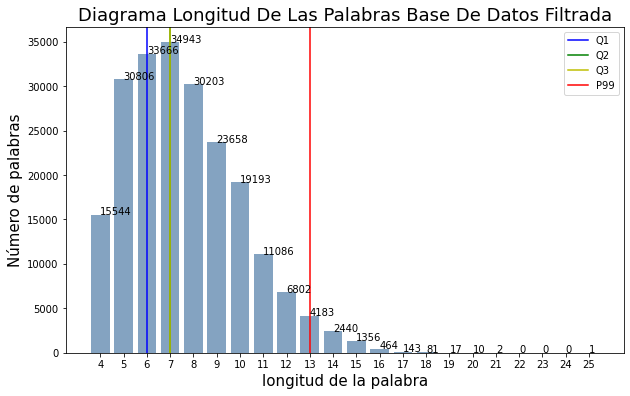

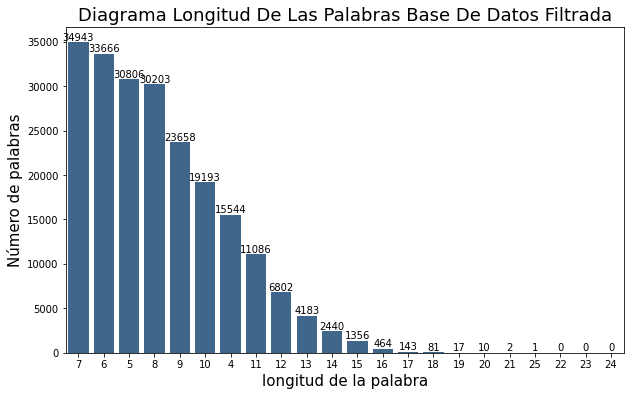

In [11]:
words_filter_long=len_words(words_filter_list)
xaxis= [str(i) for i in range(26)]
stadistics = calculate_stadistics(words_filter_long[1])
bars_diagram(xaxis[4:],words_filter_long[0][4:],'Diagrama Longitud De Las Palabras Base De Datos Filtrada',
             'longitud de la palabra','Número de palabras',stadistics,4)
bars_graphs_descending(xaxis[4:],words_filter_long[0][4:],'Diagrama Longitud De Las Palabras Base De Datos Filtrada',
             'longitud de la palabra','Número de palabras')


['predestinacionistas', 'medioambientalistas', 'hispanoamericanismo', 'escrituristicamente', 'interdisciplinarias', 'britoestadounidense', 'afroestadounidenses', 'constantinopolitano', 'geomorfologicamente', 'indiscriminadamente', 'italoestadounidense', 'caracteristicamente', 'caducifoliovirginia', 'postestructuralismo', 'constitucionalmente', 'extraordinariamente']
La mediana es: 8.0
La moda es: 8
La media es: 8.502528522972556
La varianza es: 6.781908500188598
La desviacion estandar es: 2.6042097650129103


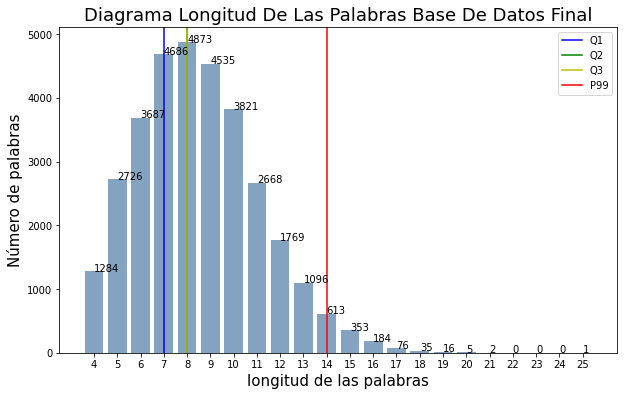

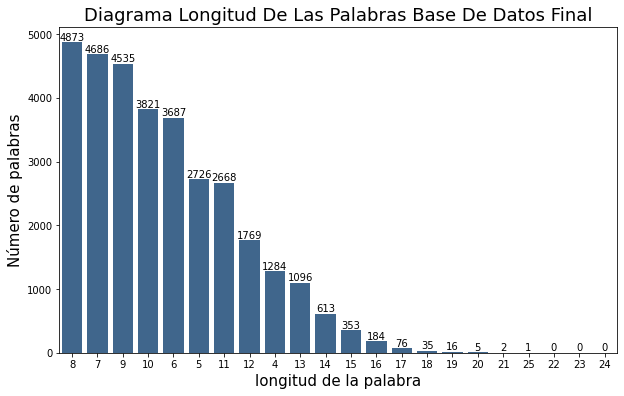

In [12]:
#analissi de las palabras por su longitud
words_final_len=len_words(words_final_list)
words_length = words_specific_length(19,words_final_list)
print(words_length)
xaxis= [str(i) for i in range(26)]
stadistics = calculate_stadistics(words_final_len[1])
bars_diagram(xaxis[4:],words_final_len[0][4:],'Diagrama Longitud De Las Palabras Base De Datos Final',
             'longitud de las palabras','Número de palabras',stadistics,4)
##------
bars_graphs_descending(xaxis[4:],words_final_len[0][4:],'Diagrama Longitud De Las Palabras Base De Datos Final',
             'longitud de la palabra','Número de palabras')

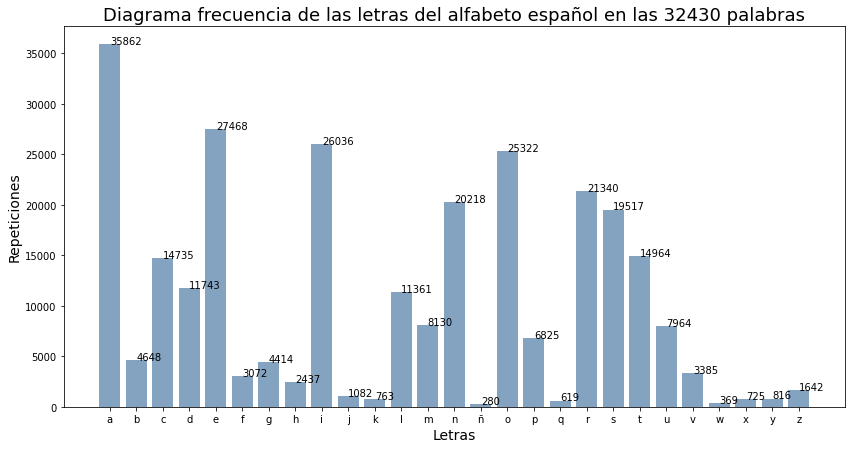

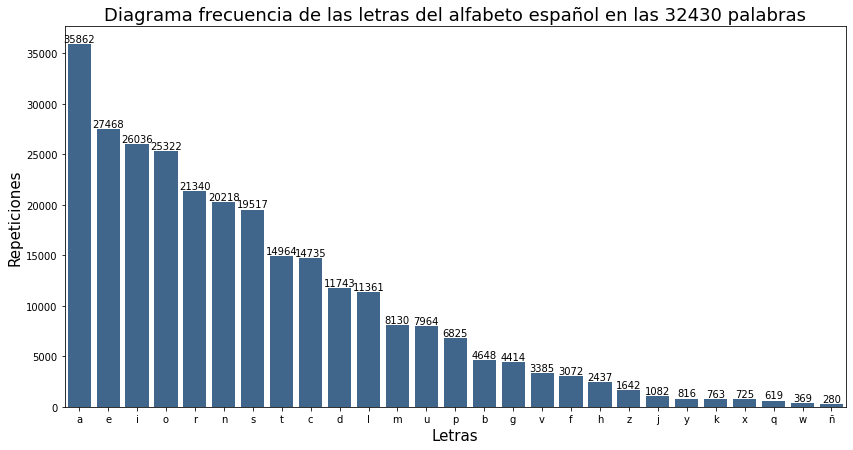

In [13]:
#Analissi de las letras y su frecuencia
position_letters_dict = posittion_dict(alphabet,words_final_list)
letter_list = [i for i in position_letters_dict]
list_letter_repetitions=[]
for j in position_letters_dict:
    list_letter_repetitions.append(len(position_letters_dict[j]))
bars_diagram(letter_list,list_letter_repetitions,'Diagrama frecuencia de las letras del alfabeto español en las {} palabras'.format(len(words_final_list)),
             'Letras','Repeticiones',None,0,14,7)
##----------------
bars_graphs_descending(letter_list,list_letter_repetitions,'Diagrama frecuencia de las letras del alfabeto español en las {} palabras'.format(len(words_final_list)),
             'Letras','Repeticiones',14,7)

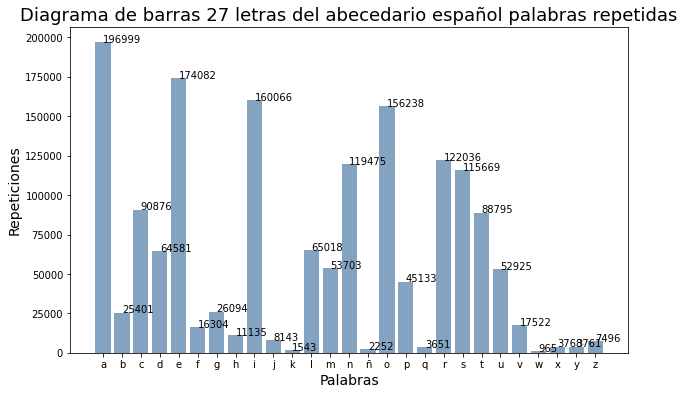

1633631


In [14]:
position_letters_dict = posittion_dict(alphabet,words_filter_list)
letter_list = [i for i in position_letters_dict]
list_letter_repetitions=[]
for j in position_letters_dict:
    list_letter_repetitions.append(len(position_letters_dict[j]))
bars_diagram(letter_list,list_letter_repetitions,'Diagrama de barras {} letras del abecedario español palabras repetidas'.format(len(alphabet)),
             'Palabras','Repeticiones')
print(sum(list_letter_repetitions))


# Letter Analysis

In [18]:
#funcion para hacer diagrama de caja y bigotes, se le ingresa un diccionario
#el priemr parametro indica la letra del diccionario a analizar o de ser None seria pra todas las letras el analisis
def boxplot_diagram(letter,dictionary,stadistics,title = 'Grafico caja y bigotes'):
    plt.figure(figsize = (15,5))
    
    if letter != None:
        sns.boxplot(dictionary[letter])
        plt.title('Grafico caja y bigotes letra: {}'.format(letter))
    else:
        sns.boxplot(sum([all_values for all_values in dictionary.values()],[]))
        plt.title(title)
    plt.axvline(stadistics[0],color = 'b',label = 'Q1')
    plt.axvline(stadistics[1],color = 'g',label = 'Q2')
    plt.axvline(stadistics[2],color = 'y',label = 'Q3')
    plt.axvline(stadistics[3],color = 'r',label = 'P99')
    plt.axvline(stadistics[9],color = 'purple',label = 'Valores Atípicos {}'.format(stadistics[9]))
    plt.ylabel('Repeticiones')
    plt.legend()
    plt.show()

In [17]:
#funcion para hacer lista por letra para un diccionario
def list_dict_data(parameter,dictionary):
    b= (max(dictionary[parameter]))
    list_dict=(dictionary[parameter])
    position_sum=[0 for i in range(b+1)]
    for j in list_dict:
        position_sum[j] += 1
    del position_sum[0]
    return position_sum

In [15]:
#Se hace el analisis por letra 
def letter_analysis(letter,dictionary):
    positions= list_dict_data(letter,dictionary)
    stadistics = calculate_stadistics(dictionary[letter])
    bars_diagram([i+1 for i in range(len(positions))],positions,'Diagrama de barras - posición letra "{}"'.format(letter),
                'Palabras','Repeticiones',stadistics,1)
    boxplot_diagram(letter,dictionary,stadistics)
    return [positions,stadistics]

La mediana es: 6.0
La moda es: 2
La media es: 5.623947353744911
La varianza es: 9.532278010501475
La desviacion estandar es: 3.0874387460322956


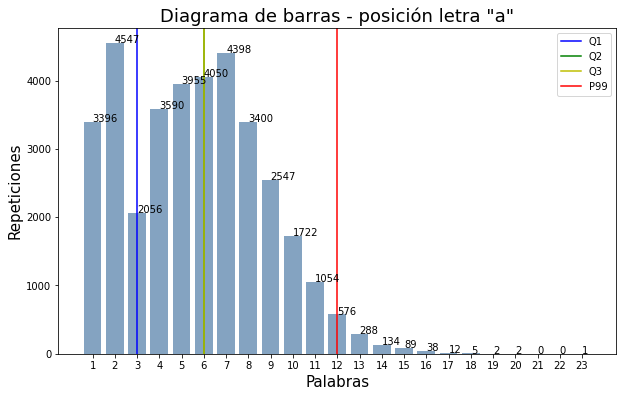

/Users/JuanJBedoya/Training_Analitica/data_understanding/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


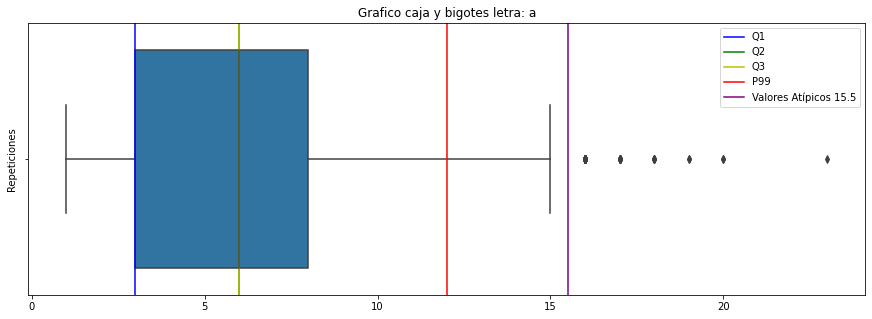

[[3396,
  4547,
  2056,
  3590,
  3955,
  4050,
  4398,
  3400,
  2547,
  1722,
  1054,
  576,
  288,
  134,
  89,
  38,
  12,
  5,
  2,
  2,
  0,
  0,
  1],
 [3.0,
  6.0,
  6.0,
  12.0,
  6.0,
  2,
  5.623947353744911,
  9.532278010501475,
  3.0874387460322956,
  15.5]]

In [26]:
position_letters_dict = posittion_dict(alphabet,words_final_list)
letter_analysis('a',position_letters_dict)

# Pruebas de hipotesis

In [19]:
# crear la lista de veces a las que se repiten las posiciones para cada letra del diccionario
def repetitions_list(dictionary,limit=float('inf')):
    
    repetitions_list = []
    positions_list = []
    for letter in dictionary:
        for position in dictionary[letter]:
            if position <= limit:
                if position >= len(repetitions_list):
                    for i in range((position-len(repetitions_list))+1):
                        repetitions_list.append(0)
                repetitions_list[position] += 1
                positions_list.append(position)
            
    del repetitions_list[0]    
    return [repetitions_list,positions_list]

In [20]:

def graphic_qqplot(numbers,title='Prueba de distribución'):
    # ==============================================================================
    df_words_frecuency = pd.DataFrame(list(zip(numbers)),
                   columns =['frecuency'])

    peso = df_words_frecuency['frecuency']
    fig, ax = plt.subplots(figsize=(10,7))
    sm.qqplot(
        peso,
        fit   = True,
        line  = 'q',
        alpha = 0.4,
        lw    = 2,
        ax    = ax
    )
    ax.set_title(title, fontsize = 16,
                 fontweight = 'bold')
    ax.tick_params(labelsize = 7)
    # Test de D'Agostino
    stat, p = normaltest(peso)
    print('Estadisticos=%.3f, p=%.3f' % (stat, p))
    # Interpretación
    alpha = 0.05
    if p > alpha:
       return print('La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
    else:
       return print('La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)')


Estadisticos=6075.322, p=0.000
La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)


/Users/JuanJBedoya/Training_Analitica/data_understanding/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


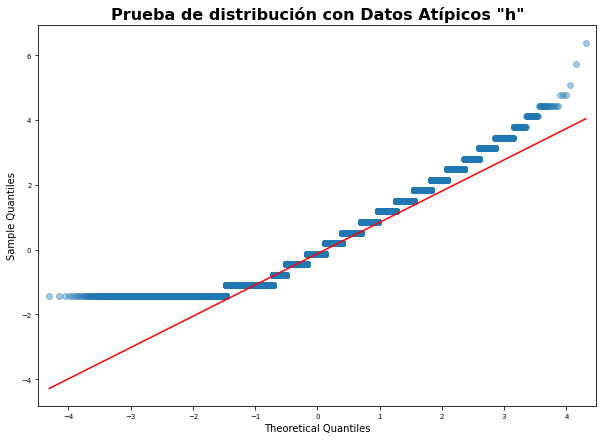

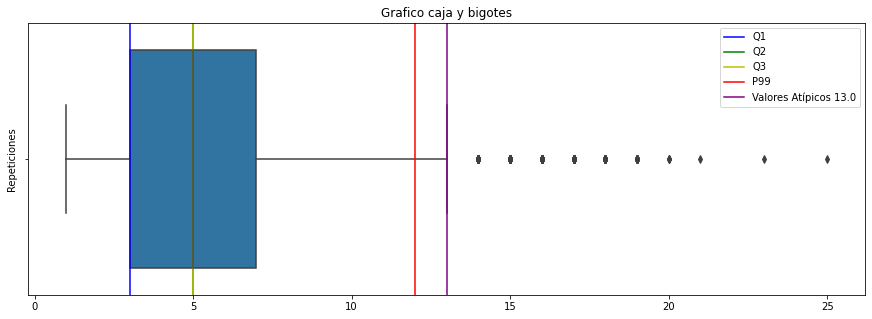

[3.0, 5.0, 5.0, 12.0, 5.0, 2, 5.388595375534031, 9.42036629823645, 3.0692615232717544, 13.0]
Estadisticos=10629.814, p=0.000
La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)


/Users/JuanJBedoya/Training_Analitica/data_understanding/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


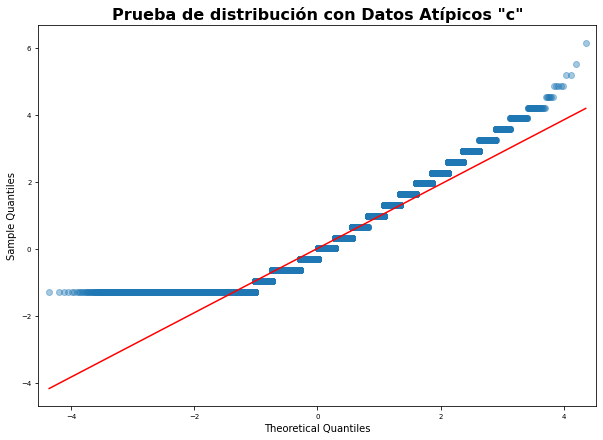

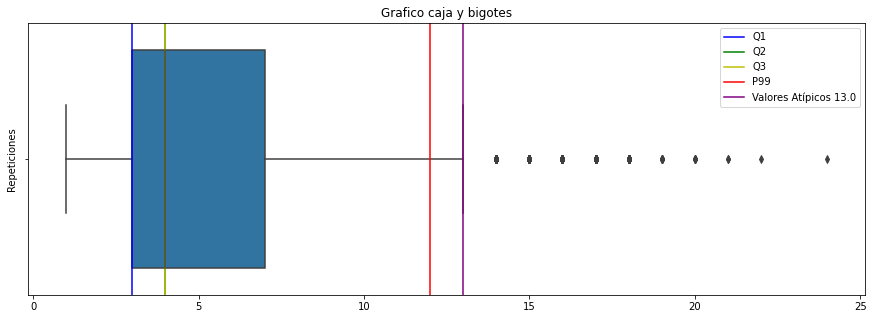

[3.0, 4.0, 4.0, 12.0, 4.0, 3, 4.958983571218604, 9.565610333106976, 3.092832089381345, 13.0]


In [21]:
position_vowels_dict = posittion_dict(vowels,words_final_list)
position_consonants_dict = posittion_dict(consonants,words_final_list)

vowels_repetitions = repetitions_list(position_vowels_dict)
graphic_vowels = graphic_qqplot(vowels_repetitions[1],'Prueba de distribución con Datos Atípicos "h"')
boxplot_vowels = boxplot_diagram(None,position_vowels_dict,calculate_stadistics(vowels_repetitions[1]))
print(calculate_stadistics(vowels_repetitions[1]))

consonants_repetitions = repetitions_list(position_consonants_dict)
graphic_consonants = graphic_qqplot(consonants_repetitions[1],'Prueba de distribución con Datos Atípicos "c"')
boxplot_consonants = boxplot_diagram(None,position_consonants_dict,calculate_stadistics(consonants_repetitions[1]))
print(calculate_stadistics(consonants_repetitions[1]))

Estadisticos=7656.423, p=0.000
La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)


/Users/JuanJBedoya/Training_Analitica/data_understanding/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


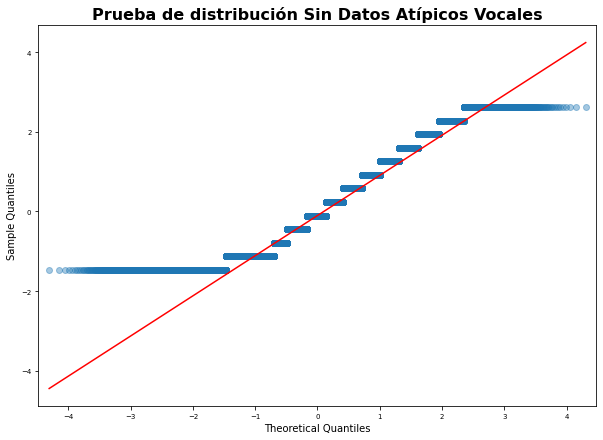

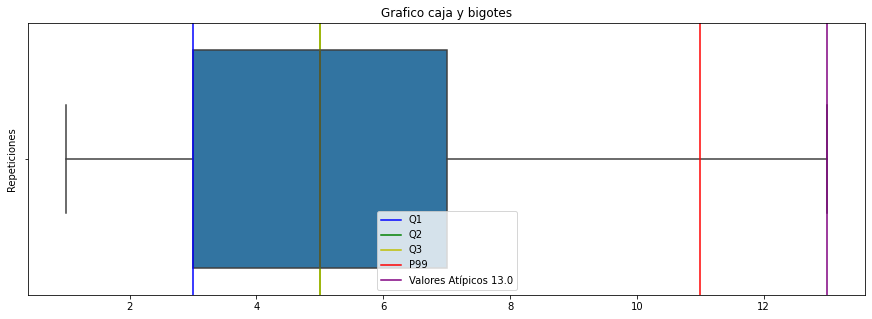

[3.0, 5.0, 5.0, 11.0, 5.0, 2, 5.301112427593471, 8.651909636649137, 2.941412864024555, 13.0]
Estadisticos=8827.269, p=0.000
La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)


/Users/JuanJBedoya/Training_Analitica/data_understanding/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


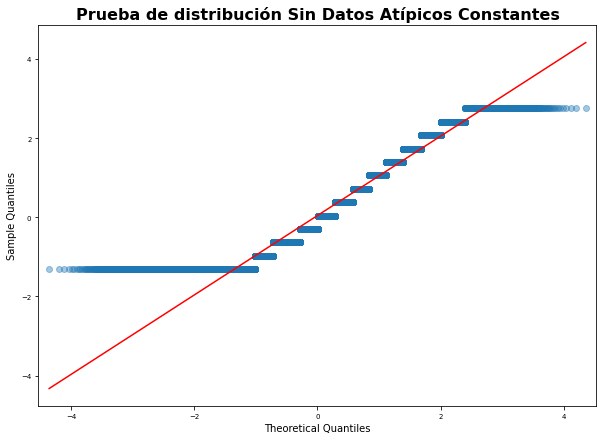

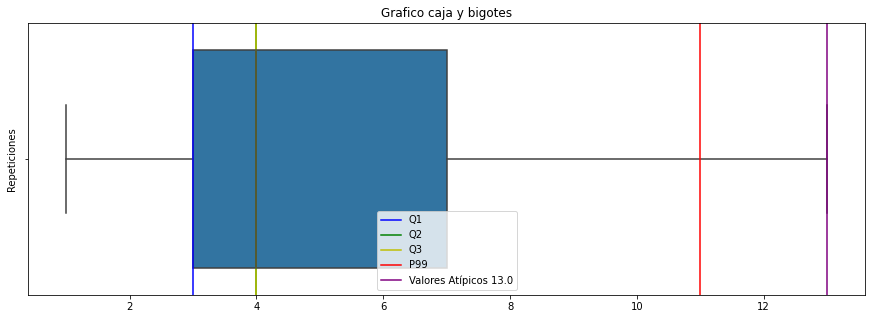

[3.0, 4.0, 4.0, 11.0, 4.0, 3, 4.868338475331593, 8.737761095043394, 2.9559704151163952, 13.0]


In [22]:
vowels_repetitions = repetitions_list(position_vowels_dict,13)
graphic_vowels = graphic_qqplot(vowels_repetitions[1],'Prueba de distribución Sin Datos Atípicos Vocales')
dict_vowels = {'positions': vowels_repetitions[1]}
boxplot_vowels = boxplot_diagram(None,dict_vowels,calculate_stadistics(vowels_repetitions[1]))
print(calculate_stadistics(vowels_repetitions[1]))

consonants_repetitions = repetitions_list(position_consonants_dict,13)
graphic_consonants = graphic_qqplot(consonants_repetitions[1],'Prueba de distribución Sin Datos Atípicos Constantes')
dict_consonants = {'positions': consonants_repetitions[1]}
boxplot_consonants = boxplot_diagram(None,dict_consonants,calculate_stadistics(consonants_repetitions[1]))
print(calculate_stadistics(consonants_repetitions[1]))

[23817, 11651, 23883, 17373, 16582, 15797, 12140, 10508, 7550, 5416, 3554, 2185, 1236]


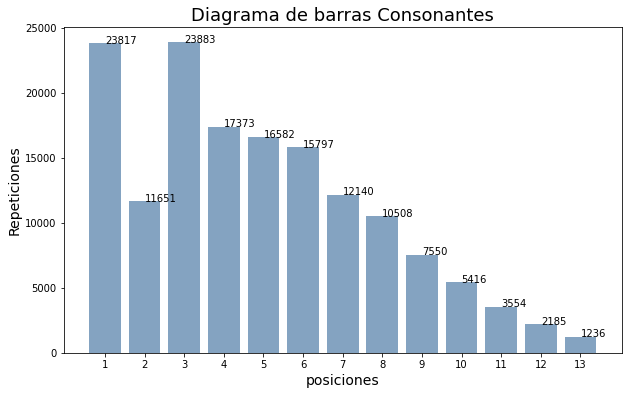

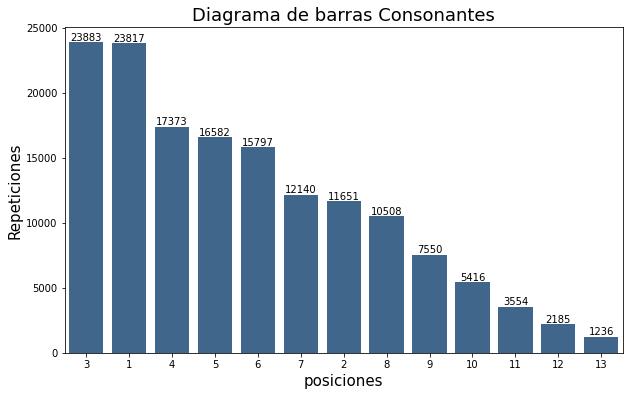

In [23]:
print(consonants_repetitions[0])
bars_diagram([x+1 for x in range(len(consonants_repetitions[0]))],consonants_repetitions[0],'Diagrama de barras Consonantes','posiciones','Repeticiones')
bars_graphs_descending([x+1 for x in range(len(consonants_repetitions[0]))],consonants_repetitions[0],'Diagrama de barras Consonantes','posiciones','Repeticiones')

[8613, 20779, 8547, 15057, 14564, 12623, 12593, 9539, 7624, 5223, 3264, 1965, 1145]


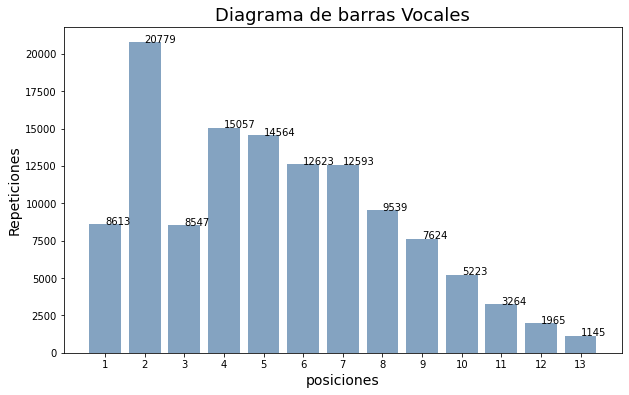

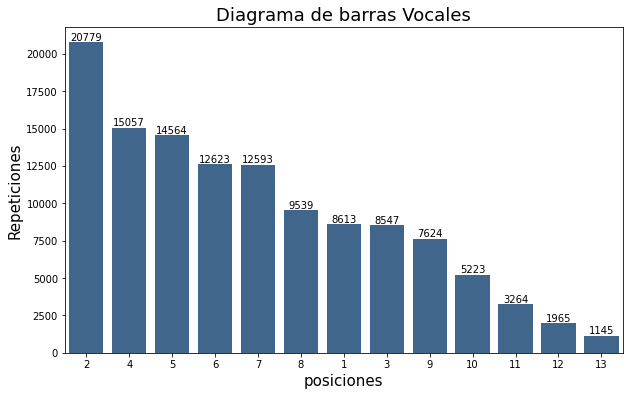

In [24]:
print(vowels_repetitions[0])
bars_diagram([x+1 for x in range(len(vowels_repetitions[0]))],vowels_repetitions[0],'Diagrama de barras Vocales','posiciones','Repeticiones')
bars_graphs_descending([x+1 for x in range(len(vowels_repetitions[0]))],vowels_repetitions[0],'Diagrama de barras Vocales','posiciones','Repeticiones')

In [25]:
stats.ks_2samp(vowels_repetitions[1],consonants_repetitions[1])

KstestResult(statistic=0.08614104817094453, pvalue=0.0)

In [26]:
print(max(consonants_repetitions[1]))
lista = sum([new_value for new_value in position_consonants_dict.values()],[])
print(len(lista))



13
153085


# Correlaciones

In [27]:
def letter_frecuency_wlength_dict(letters,words):

    frecuencies_dict = {}   
    for word in words:
        for letter in range(len(word)):
            if word[letter] in letters:
                if len(word) not in frecuencies_dict:
                    frecuencies_dict[len(word)] = []
                frecuencies_dict[len(word)].append(letter+1)
    
    for letter_key in frecuencies_dict:
        frecuencies_dict[letter_key] = len(frecuencies_dict[letter_key])


    return frecuencies_dict



In [28]:
vowels_length_dict = letter_frecuency_wlength_dict(vowels,words_final_list)
consonants_length_dict = letter_frecuency_wlength_dict(consonants,words_final_list)
#print(vowels_length_dict)
df1 = pd.DataFrame(list(vowels_length_dict.items()), columns=['Lenght', 'Frecuency_Vowels'] )

df2 = pd.DataFrame(list(consonants_length_dict.items()), columns=['Lenght', 'Frecuency_consonants'] )


df3 = df1.merge(df2, how = 'outer')
df3.sort_values(by=['Lenght'])


,Lenght,Frecuency_Vowels,Frecuency_consonants
9,4,2318,2818
2,5,5994,7636
0,6,9857,12265
3,7,14722,18080
6,8,17351,21633
8,9,18247,22568
10,10,16938,21272
5,11,12983,16365
11,12,9418,11810
4,13,6278,7970


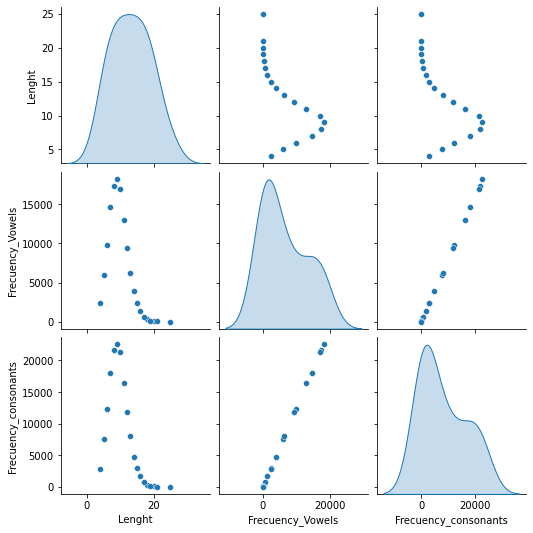

In [29]:
df4= df3[['Frecuency_Vowels','Frecuency_consonants']]
sns.pairplot(df3,diag_kind='kde')

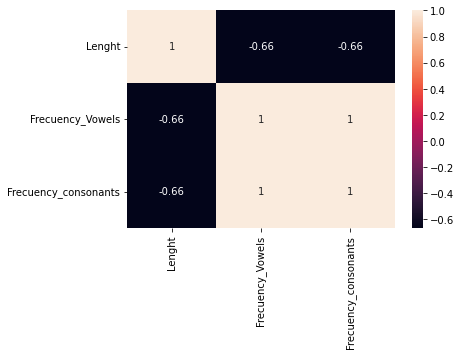

In [30]:
sns.heatmap(df3.corr(method='pearson'),annot = True)
plt.show()

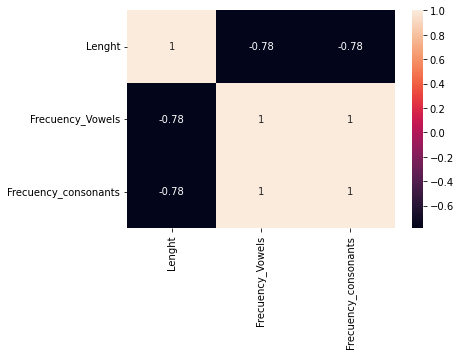

In [31]:
sns.heatmap(df3.corr(method='spearman'),annot = True)
plt.show()

In [43]:
def count_letters(letters,words):
    repetitions_in_words_list = []
    for word in words:
        cont = 0
        for letter in word:
            if letter in letters:
                cont += 1
        
        repetitions_in_words_list.append(cont)
    return repetitions_in_words_list

vowels_in_word = count_letters(vowels,words_final_list)
consonants_in_word = count_letters(consonants,words_final_list)
length = len_words(words_final_list)
print(len(length[1]))

df = pd.DataFrame(list(zip(vowels_in_word,consonants_in_word,length[1])),
                                columns =['Vocales','Consonantes','Longitud'])

print(df)

32430
       Vocales  Consonantes  Longitud
0            2            4         6
1            6            9        15
2            2            3         5
3            3            4         7
4            2            3         5
...        ...          ...       ...
32425        3            6         9
32426        5            5        10
32427        4            3         7
32428        5            8        13
32429        5            6        11

[32430 rows x 3 columns]


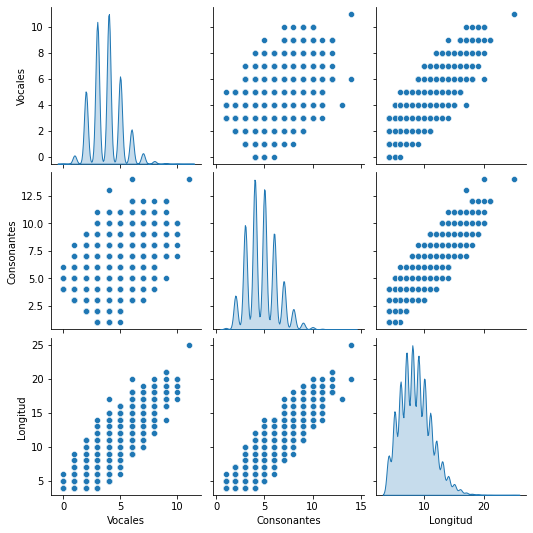

In [44]:
sns.pairplot(df,diag_kind='kde')

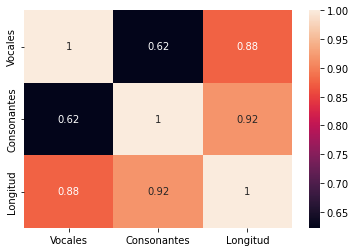

In [45]:
sns.heatmap(df.corr(method='spearman'),annot = True)
plt.show()

# Analize by length and number of vowels

In [19]:
def words_specific_length(words_list,long):    
    words = []
    for word in words_list:
        if len(word) == long:
            words.append(word)
    return words

def words_by_vowels(words_list,num_vowels):
    word_list_by_vowels = []
    for word in words_list:
        count_vowels = len(re.findall("[aeiou]", word))
        if count_vowels == num_vowels:
            word_list_by_vowels.append(word)
    return word_list_by_vowels

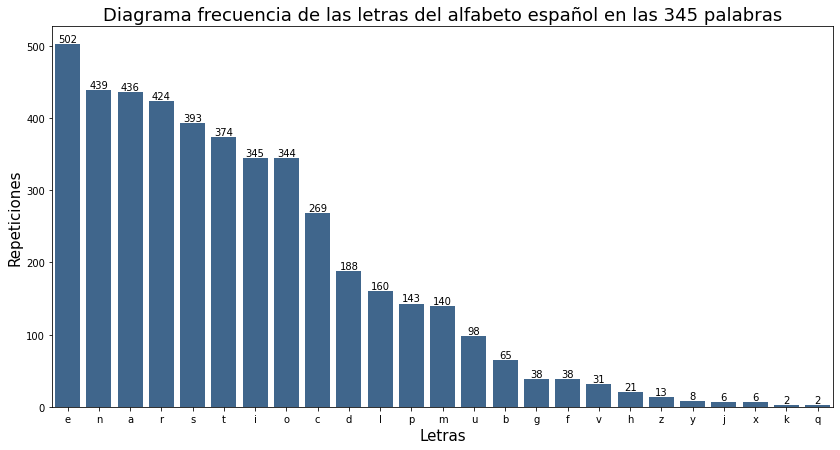

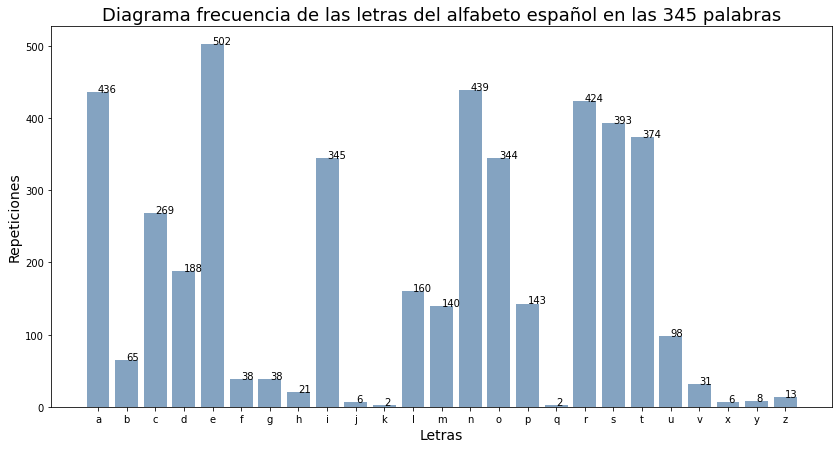

In [24]:
length = 13
vowels = 5

words_by_length = words_specific_length(words_final_list,length)
#print(dummy)
filt = words_by_vowels(words_by_length,vowels)
#print(filt)
#Analissi de las letras y su frecuencia
position_letters_dict = posittion_dict(alphabet,filt)
letter_list = [i for i in position_letters_dict]
list_letter_repetitions=[]
for j in position_letters_dict:
    list_letter_repetitions.append(len(position_letters_dict[j]))


bars_graphs_descending(letter_list,list_letter_repetitions,'Diagrama frecuencia de las letras del alfabeto español en las {} palabras'.format(len(filt)),
             'Letras','Repeticiones',14,7)
##----------------
bars_diagram(letter_list,list_letter_repetitions,'Diagrama frecuencia de las letras del alfabeto español en las {} palabras'.format(len(filt)),
             'Letras','Repeticiones',None,0,14,7)

La mediana es: 3.0
La moda es: 3
La media es: 2.683673469387755
La varianza es: 1.03259058725531
La desviacion estandar es: 1.016164645741678


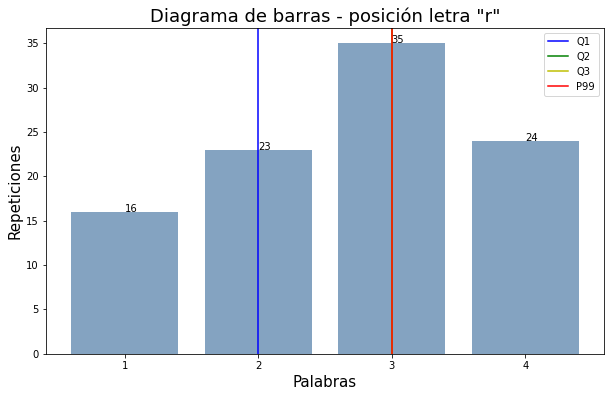

/Users/JuanJBedoya/Training_Analitica/data_understanding/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


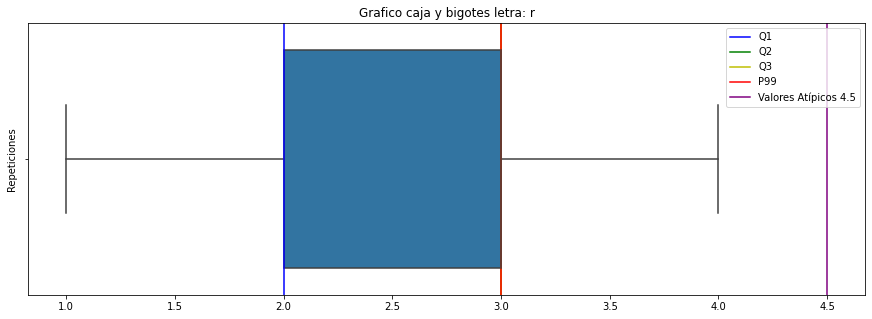

[[16, 23, 35, 24],
 [2.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3,
  2.683673469387755,
  1.03259058725531,
  1.016164645741678,
  4.5]]

In [21]:
letter_analysis('r',position_letters_dict)